In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from mpl_toolkits.mplot3d import Axes3D
from typing import List
import glob
import os
import gzip
from tqdm import tqdm
import seaborn as sns
import natsort
import hashlib
import random


In [2]:
df = pd.read_csv(r"C:\PhD\experiments\fish_experiments\FishSizeKinematics\streaks_df.csv")

In [3]:
angles = [30, 45, 60, 90]
proximity_thresholds = [0.01, 0.02, 0.03, 0.04, 0.05]
streak_length_thresholds = [20, 30, 40]

In [4]:
df

,file_path,angle,proximity_threshold,streak_length_threshold,streak_lengths,number_of_streaks
0,C:\PhD\experiments\fish_experiments\FishSizeKi...,30,0.01,20,[],0
1,C:\PhD\experiments\fish_experiments\FishSizeKi...,30,0.01,30,[],0
2,C:\PhD\experiments\fish_experiments\FishSizeKi...,30,0.01,40,[],0
3,C:\PhD\experiments\fish_experiments\FishSizeKi...,30,0.02,20,[93 25 27 22 48 21],6
4,C:\PhD\experiments\fish_experiments\FishSizeKi...,30,0.02,30,[93 48],2
...,...,...,...,...,...,...
5515,C:\PhD\experiments\fish_experiments\FishSizeKi...,90,0.04,30,[ 60 38 149 117 40 36 31 33 48 87 86 ...,103
5516,C:\PhD\experiments\fish_experiments\FishSizeKi...,90,0.04,40,[ 60 149 117 40 48 87 86 62 88 44 60 1...,80
5517,C:\PhD\experiments\fish_experiments\FishSizeKi...,90,0.05,20,[ 41 37 64 60 188 164 55 51 63 27 41 ...,214
5518,C:\PhD\experiments\fish_experiments\FishSizeKi...,90,0.05,30,[ 41 37 64 60 188 164 55 51 63 41 31 ...,168


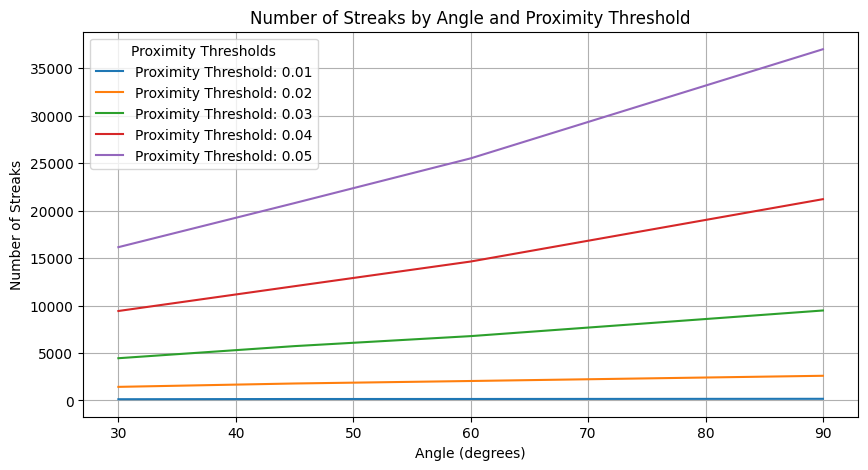

In [5]:
plt.figure(figsize=(10,5))

# Iterate over each proximity threshold to create separate lines on the plot
for proximity_threshold in proximity_thresholds:
    # Initialize a list to store the number of streaks for each angle
    num_streaks_list = []

    # Iterate over each angle
    for angle in angles:
        # Filter the DataFrame for the current angle and proximity threshold
        filtered_df = df[(df['angle'] == angle) & (df['proximity_threshold'] == proximity_threshold)]
        
        # Sum the number of streaks for the filtered DataFrame
        total_num_streaks = filtered_df['number_of_streaks'].sum()
        
        # Append the calculated value to the list
        num_streaks_list.append(total_num_streaks)

    # Plot the number of streaks for the current proximity threshold
    plt.plot(angles, num_streaks_list, label=f'Proximity Threshold: {proximity_threshold}')

# Add labels and title to the plot
plt.xlabel('Angle (degrees)')
plt.ylabel('Number of Streaks')
plt.title('Number of Streaks by Angle and Proximity Threshold')
plt.legend(title='Proximity Thresholds')
plt.grid(True)

# Show the plot
plt.show()

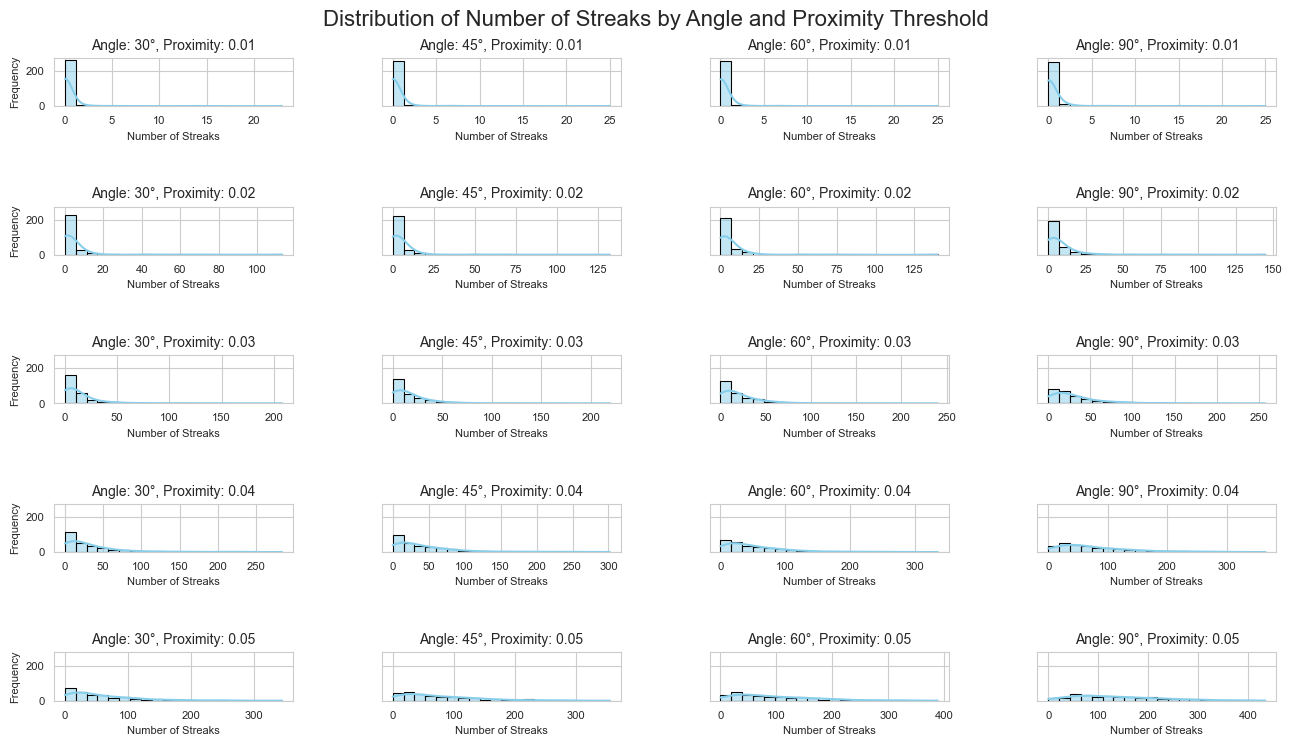

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plots
sns.set_style("whitegrid")

# Set up the figure for the histograms
fig, axes = plt.subplots(len(proximity_thresholds), len(angles), figsize=(14, 8), sharey=True)

# Adjust the layout and spacing
fig.tight_layout(pad=5.0)
fig.subplots_adjust(top=0.92)

# Add a main title
fig.suptitle('Distribution of Number of Streaks by Angle and Proximity Threshold', fontsize=16)

# Iterate over each proximity threshold and angle to create separate histograms
for i, proximity_threshold in enumerate(proximity_thresholds):
    for j, angle in enumerate(angles):
        # Filter the DataFrame for the current angle and proximity threshold
        filtered_df = df[(df['angle'] == angle) & (df['proximity_threshold'] == proximity_threshold)]
        
        # Plot the histogram for the current angle and proximity threshold
        sns.histplot(filtered_df['number_of_streaks'], bins=20, edgecolor='black', color='skyblue', ax=axes[i, j], kde=True)
        axes[i, j].set_title(f'Angle: {angle}°, Proximity: {proximity_threshold}', fontsize=10)
        axes[i, j].set_xlabel('Number of Streaks', fontsize=8)
        axes[i, j].set_ylabel('Frequency', fontsize=8)
        axes[i, j].tick_params(axis='both', which='major', labelsize=8)

# Show the histograms
plt.show()

In [16]:
# Function to convert the non-standard list string to an actual list of floats
def convert_to_list_of_floats(non_standard_list_str):
    # Remove the square brackets
    cleaned_str = non_standard_list_str.strip('[]')
    # Split the string by spaces and convert each to float
    return [float(num_str) for num_str in cleaned_str.split()]

# Apply the function to each element in the 'streak_lengths' column
df['streak_lengths'] = df['streak_lengths'].apply(convert_to_list_of_floats)

In [17]:
df

,file_path,angle,proximity_threshold,streak_length_threshold,streak_lengths,number_of_streaks
0,C:\PhD\experiments\fish_experiments\FishSizeKi...,30,0.01,20,[],0
1,C:\PhD\experiments\fish_experiments\FishSizeKi...,30,0.01,30,[],0
2,C:\PhD\experiments\fish_experiments\FishSizeKi...,30,0.01,40,[],0
3,C:\PhD\experiments\fish_experiments\FishSizeKi...,30,0.02,20,"[93.0, 25.0, 27.0, 22.0, 48.0, 21.0]",6
4,C:\PhD\experiments\fish_experiments\FishSizeKi...,30,0.02,30,"[93.0, 48.0]",2
...,...,...,...,...,...,...
5515,C:\PhD\experiments\fish_experiments\FishSizeKi...,90,0.04,30,"[60.0, 38.0, 149.0, 117.0, 40.0, 36.0, 31.0, 3...",103
5516,C:\PhD\experiments\fish_experiments\FishSizeKi...,90,0.04,40,"[60.0, 149.0, 117.0, 40.0, 48.0, 87.0, 86.0, 6...",80
5517,C:\PhD\experiments\fish_experiments\FishSizeKi...,90,0.05,20,"[41.0, 37.0, 64.0, 60.0, 188.0, 164.0, 55.0, 5...",214
5518,C:\PhD\experiments\fish_experiments\FishSizeKi...,90,0.05,30,"[41.0, 37.0, 64.0, 60.0, 188.0, 164.0, 55.0, 5...",168


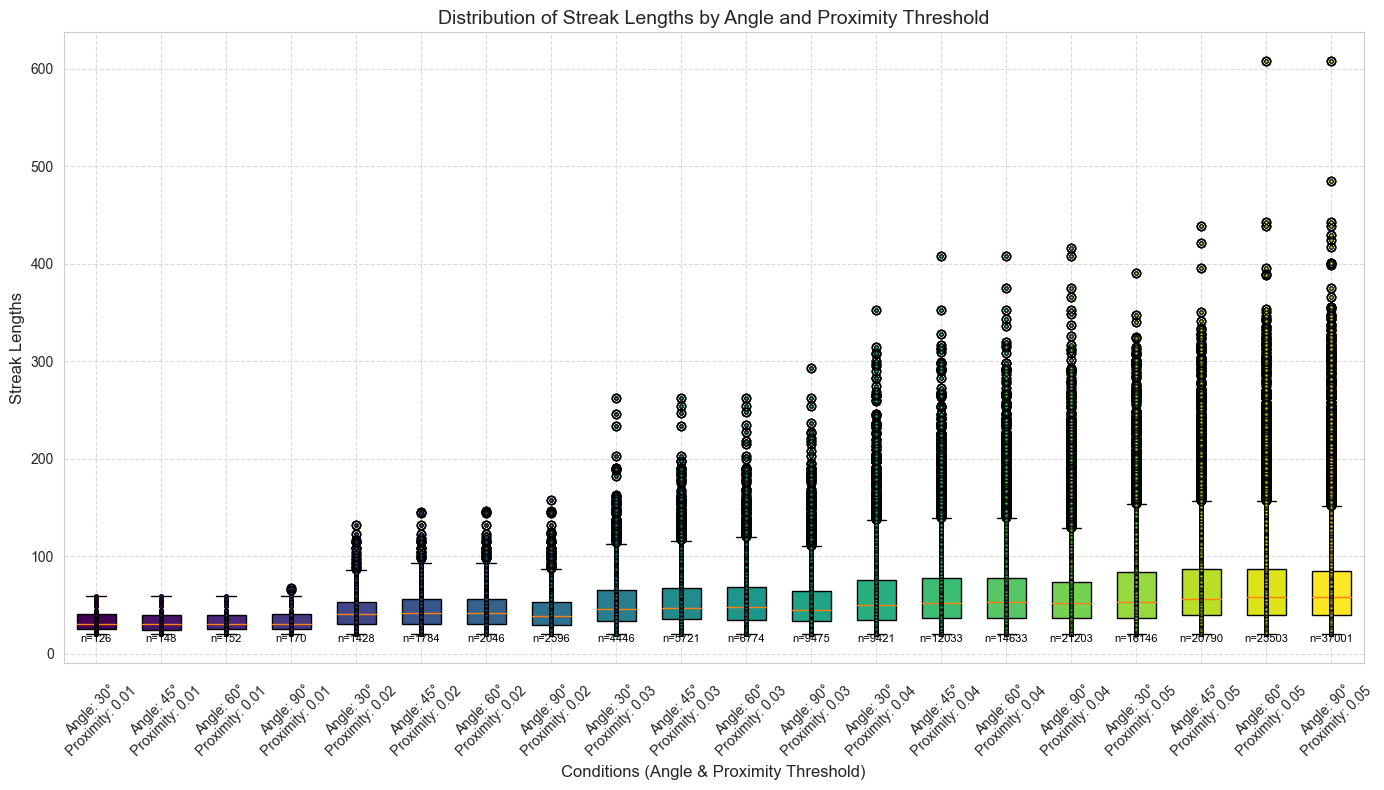

In [19]:
# Code for plotting
plt.figure(figsize=(14, 8))

# Prepare data for box plots
data_to_plot = []
labels = []
positions = []
colors = plt.cm.viridis(np.linspace(0, 1, len(proximity_thresholds) * len(angles)))

current_position = 1
for i, (proximity_threshold, angle) in enumerate([(pt, a) for pt in proximity_thresholds for a in angles]):
    filtered_df = df[(df['angle'] == angle) & (df['proximity_threshold'] == proximity_threshold)]
    all_lengths = [length for sublist in filtered_df['streak_lengths'] for length in sublist]
    
    if all_lengths:
        data_to_plot.append(all_lengths)
        labels.append(f'Angle: {angle}°\nProximity: {proximity_threshold}')
        positions.append(current_position)

        plt.scatter([current_position] * len(all_lengths), all_lengths, alpha=0.6, color=colors[i], edgecolor='black', s=6, zorder=2)
        current_position += 1

boxplots = plt.boxplot(data_to_plot, positions=positions, widths=0.6, patch_artist=True, zorder=1)

for patch, color in zip(boxplots['boxes'], colors):
    patch.set_facecolor(color)

for i, whisker in enumerate(boxplots['whiskers'][::2]):  # Use the bottom whiskers
    num_streaks = len(data_to_plot[i])
    x_position = positions[i]
    y_position = whisker.get_ydata()[1]  # Bottom of the whisker
    plt.text(x_position, y_position, f'n={num_streaks}', horizontalalignment='center', verticalalignment='top', fontsize=8, color='black')

plt.xlabel('Conditions (Angle & Proximity Threshold)', fontsize=12)
plt.ylabel('Streak Lengths', fontsize=12)
plt.title('Distribution of Streak Lengths by Angle and Proximity Threshold', fontsize=14)
plt.xticks(ticks=positions, labels=labels, rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
